# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy.stats import stats
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


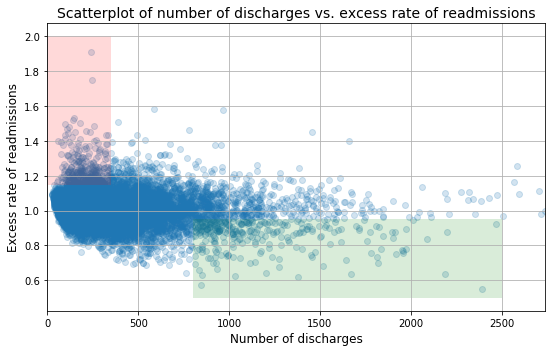

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

I do not necessarily agree with the above analysis and recommendations.

Many of the conclusions seem to be unfounded.  Based on an intial look at the plot it appears that the rate of readmissions may be trending down as number of discharges increase but it is not clear if this truly the case or that whether or not is the downward trend is significant.  A hypothesis test needs to be conducted.

In [6]:
hospital_read_nonull = clean_hospital_read_df.dropna(subset = ['Number of Discharges', 'Excess Readmission Ratio'])

#check statistics
small_hosps = hospital_read_nonull[hospital_read_nonull['Number of Discharges'] < 100]
small_hosps_meanerr = round(np.mean(small_hosps['Excess Readmission Ratio']),3)
sh_percent_over_1 = round(np.sum(small_hosps['Excess Readmission Ratio'] > 1)/len(small_hosps['Excess Readmission Ratio']) *100,2)
large_hosps = hospital_read_nonull[hospital_read_nonull['Number of Discharges'] > 1000]
large_hosps_meanerr = round(np.mean(large_hosps['Excess Readmission Ratio']),3)
lh_percent_over_1 = round(np.sum(large_hosps['Excess Readmission Ratio'] > 1)/len(large_hosps['Excess Readmission Ratio']) *100, 2)

print('In hospitals/facilities with number of discharges < 100 mean excess readmission rate is ', small_hosps_meanerr,  ' and ', sh_percent_over_1, '% have excess readmission rate greater than 1')
print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is ', large_hosps_meanerr, ' and ', lh_percent_over_1,'% have excess readmission rate greater than 1')

In hospitals/facilities with number of discharges < 100 mean excess readmission rate is  1.023  and  63.22 % have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is  0.978  and  44.49 % have excess readmission rate greater than 1


While the statistics were calculated correctly, but it does not necessarily mean that they are significant, and they may be misleading. 

It is also unclear why 100 and 1,000 was chosen as the thresholds, as well as why in the recommendations she uses hospitals with number of discharges less than 300, as the threshold for small hospitals.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [7]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [9]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


### 1. Setup an appropriate hypothesis test.

Null hypothesis: There is no correlation between the readmissions rate and the number of discharges. <br>
$H_{0}$: $\rho$ = 0 <br>
Alt. hypothesis: There is a correlation between the readmissions rate and the number of discharges. <br>
$H_{A}$: $\rho$ $\neq$ 0

### 2. Compute and report the observed significance value (or p-value).

I will simulate data assuming the null is true, i.e. there is no correlation. <br>
I will use a permutation test, where I permutate just the excess hospital readmissions ratio.  This will eliminate any correlation.

In [10]:
#first drop null values
num_discharges = hospital_read_nonull['Number of Discharges']
excess_read_ratio = hospital_read_nonull['Excess Readmission Ratio']

obs_corr = np.corrcoef(num_discharges, excess_read_ratio)[0,1]
print('Observed correlation between number of discharges and the excess readmission ratio: ', obs_corr)
#
perm_reps = np.empty(100000)
for i in range(100000):
    perm_excess_read_ratio = np.random.permutation(excess_read_ratio)
    perm_reps[i] = np.corrcoef(num_discharges, perm_excess_read_ratio)[0,1]

p_value = sum(perm_reps <= obs_corr)/100000    
print('p-value: ', p_value)


Observed correlation between number of discharges and the excess readmission ratio:  -0.09739794351079353
p-value:  0.0


###  3. Report statistical significance for $\alpha$ = .01. 

Since the p-value is 0, it means that out of 100,000 permutations, there was never a correlation coefficient as low as -0.0974.  For $\alpha$ = .01, we can reject the null hypothesis, and conclude that there is a **statistically** significant correlation between the number of discharges and the excess readmission ratio. 

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The statistical significance tells us that correlation does exist since the observed correlation of the sample (-0.0974) would have been very unlikely if the null hypothesis were true.  While the low p-value does tell us that there is most likely a correlation, it does not tell us how important it is in practice.  

In this case, the statistical and practical significance do differ. Although correlation does exixt, -0.0974 is considered a weak negative correlation. 

In [11]:
m, b = np.polyfit(num_discharges, excess_read_ratio, deg = 1)
eq_of_line = 'excess read. ratio = '+ str(round(m,7)) + ' * num. discharges + ' + str(round(b,3))
print(eq_of_line)

coef_of_det = obs_corr**2
print('Coefficient of Determination: ', coef_of_det)

excess read. ratio = -2.9e-05 * num. discharges + 1.018
Coefficient of Determination:  0.009486359400131728


Also, examining the linear regression line, we see that the slope is -0.000029.  That, is for every increase of 1,000 discharges, the excess readmission ratio decreases by 0.029. Given this, I would not necessarily recommend that smaller hospitals consolidate, as the costs will most likely not be worth it.  For many smaller hospitals, it may not be feasible to consolidate since they may be in rural areas, for example.  

Furthermore, the correficient of determination (the corr. coef squared) is only 0.00948 which tell us that only 0.00948 of the variation in the readmission ratio can be explained by the number of discharges.
Given this, the hospital should consider looking into other factors that may effect excess readmissions rate, rather than make small hospitals consolidate .

### 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


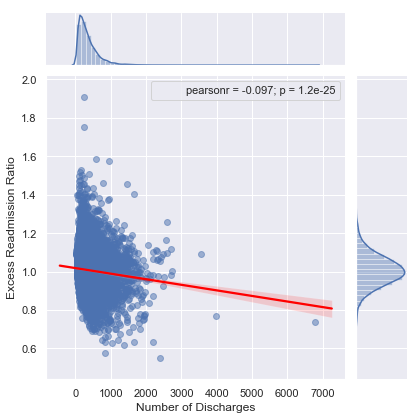

In [12]:
sns.set()

jplot = sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data = clean_hospital_read_df, kind = 'reg', scatter_kws = {'alpha': 0.5}, line_kws = {'color':'red'})
jplot.annotate(stats.pearsonr)
#plt.text(5500, 1.95, 'pearson r: '+str(round(obs_corr,4)), fontsize = 9)
plt.show()

This graph is much clearer, and displaying the pearson r coefficient is less misleading, because we see on the plot itself that the linear relationship is weak.